## Introduction

### Scientific Question:
How does the sequence and structure of tyrosinase, which cause colour point colouration in cats, differ from the tyrosinase that causes a similar phenotype in rabbits, and that which is responsible for the first step of melanin in humans?

### Scientific Hypothesis:
If the cat and rabbit tyrosinase causes a similar phenotype, then their sequences and structures should also be more similar to each other than to the tyrosinase in humans, which does not cause humans to exhibit colour point colouration.

### Background

Colorpoint colouration can be commonly seen in cats and rabbits and is caused by mutations in the tyrosinase gene. These mutations cause tyrosinase to become temperature sensitive. At high temperatures, such as a rabbit's or cat's body, tyrosinase will not create melanin, so the fur remains white. If the temperature is colder, such as on the tail, ears, parts of the face, and appendages, tyrosinase produces melanin and the fur grows darker. This is what gives Siamese cats and Himalayan rabbits their iconic look. Tyrosinase is an integral part of melanin production in cats, rabbits, and humans, although it does not cause colorpoint colouration in humans. For cats, according to uniprot, the mutation responsible for colorpoint colouration in siamese cats is found at position 227, where amino acid Glycine (G) is changed to Tryptophan (W). (https://www.uniprot.org/uniprot/P55033)

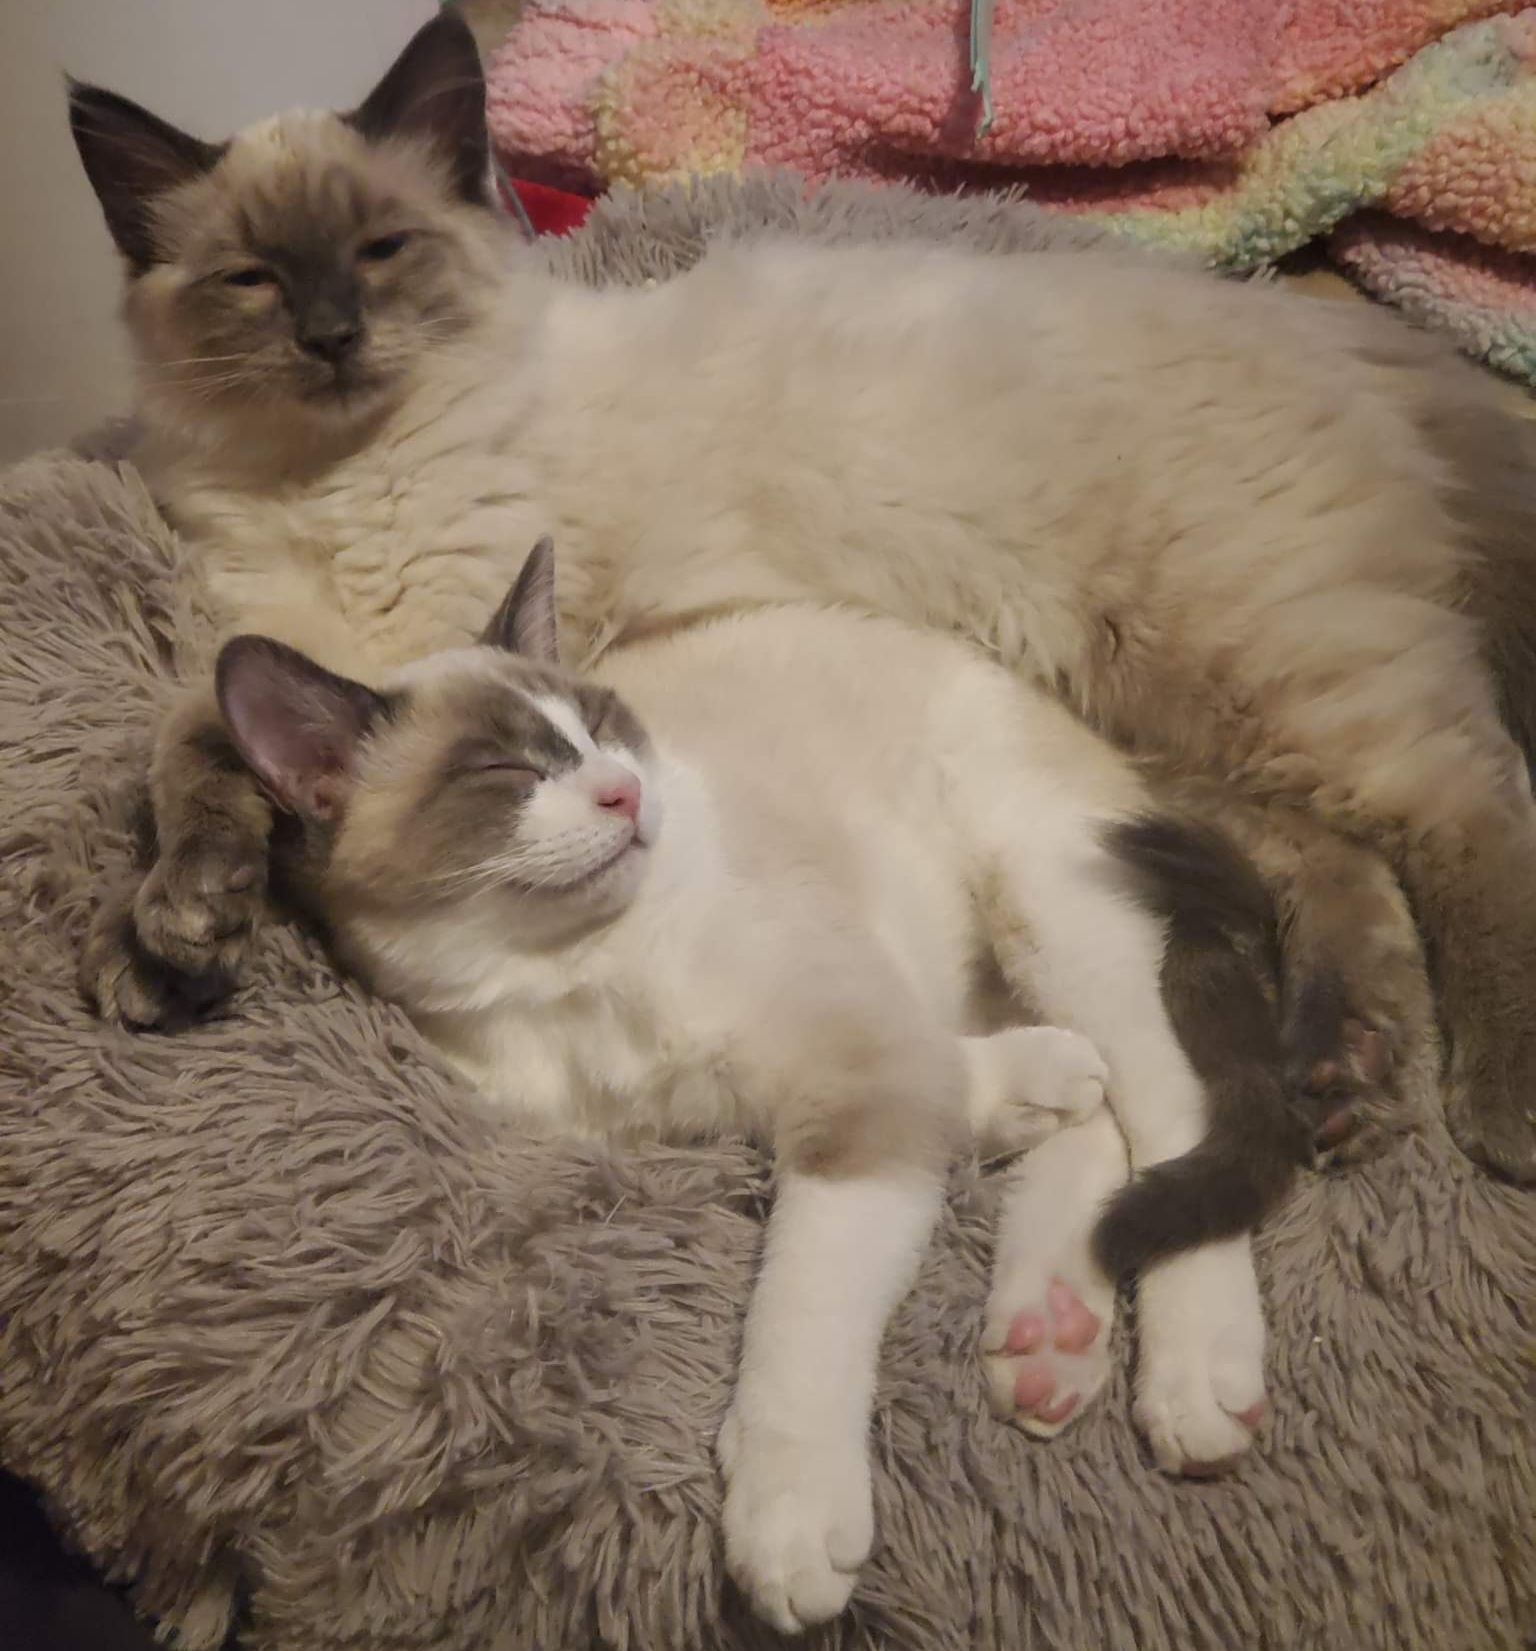

### Analyses

##### Pairwise Sequence Alignment
This is used to align two sequences and then gives an alignment score. The higher the score, the better the alignment. In this project, both globalms and globalxx sequence alignments were used. With globalxx, there are no deducted points if there are mismatches or gaps. In this project, it was used to make align two sequences to make the dot plots. For globalms, you are able to add penalties for gaps and mismatches and this was used to make the sequence logos in this project. The sequences aligned were cat tyrosinase to rabbit tyrosinase, cat tyrosinase to human tyrosinase, and human tyrosinase to rabbit tyrosinase. The separate scores were then compared to each other. The data for these alignments came from sequences taken from fasta files for each tyrosinase type.

##### Dot Plot
The dot plot took input from the three separate globalxx (pairwise) alignments (Cat:Rab, Cat:Human, Human:Rab) to make three separate dot plots. If there is a mark, it means that the sequences aligned there. No mark represents where the sequences did not align.

##### Sequence Logos
This visualization took input from globalms (pairwise) alignments of the sequences (Cat:Rab, Cat:Human, Human:Rab) and made three separate sequence logos showing which amino acids are common at the positions. If the same amino acid appears in the same spot for each sequence, it will be large and there will only be one amino acid. If there are differences, there will be the two different amino acids shown, one stacked on top of the other.

##### SWISS Model - Homology Modeling
This was used to create a homology model between the three sequences (Cat:Rab, Cat:Human, Human:Rab). A Rabbit tyrosinase protein model (pdb) could not be found, so its amino acid sequence (fasta) was used as the target sequence when comparing it with cats and it with humans. The template file for those was what was being compared, cat or human. For the cat human model, cat was used as the target sequence and human was used as the template. This builds a 3D model from an amino acid sequence, based on another 3D model (template).

##### PyMOL
This was used to compare the pdb files and the models made from the homology modeling and make videos. Four videos were made: Cat Rabbit Model, Cat Human Aligned (Cat 3D protein, human 3D protein, and Cat Human Model), Rabbit Human Model, and Cat Human Model. This allows for protein differences to be easily noticed.

### Data

##### Cat Tyrosinase
https://www.uniprot.org/uniprot/P55033

Fasta:
https://swissmodel.expasy.org/repository/uniprot/P55033

PDB:
https://alphafold.ebi.ac.uk/entry/P55033


##### Rabbit Tyrosinase
https://www.uniprot.org/uniprot/Q9MYI7

Fasta:
https://swissmodel.expasy.org/repository/uniprot/Q9MYI7


##### Human Tyrosinase
https://www.uniprot.org/uniprot/P14679

Fasta:
https://swissmodel.expasy.org/repository/uniprot/P14679

PDB:
https://alphafold.ebi.ac.uk/entry/P14679

## Importing


### SeqIO: 
This is a biopython package used to work with different sequence file formats. In this project, it is used to read fasta files containing amino acid sequences, so that those sequences can later be used in pairwise sequence alignment and the dot plot. If it does not load, make sure it is installed within anaconda. To learn more: https://biopython.org/wiki/SeqIO


### pylab:
This is a package used for working with matrices and arrays. In this project, it is used for designing and generating the dot plot. If it does not load, make sure it is installed within anaconda. It imports both Numpy (arrays and math) and matplotlib.pyplot (plotting graphs). To learn more: https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm


### pairwise2:
This is a package from Biopython that is used to align two sequences and then gives a score. It was used twice in this experiment to generate the dot plots and sequence logos. Scores are generated after parameters such as gap and mismatch penalties and match points are set. If it does not load, make sure it is installed within anaconda. To learn more: https://biopython.org/docs/1.75/api/Bio.pairwise2.html


### logomaker:
logomaker is used to make the sequence logos. It is installed via pip install. To learn more: https://github.com/jbkinney/logomaker/tree/76aae02e03af9a5abc0880054d7d0c9a6f571c07/logomaker/tutorials 


### format_alignment
This was used for sequence logos and needed to be explicitly installed due to an error.

In [335]:
from Bio import SeqIO
import pylab
from Bio import pairwise2
import logomaker as lm
from Bio.pairwise2 import format_alignment

In [336]:
pip install logomaker

Note: you may need to restart the kernel to use updated packages.


## Importing Data (Fasta)

In [337]:
#cat_tyr_AA = SeqIO.read("P55033.fasta", "fasta")
#print(cat_tyr_AA)
#print(len(cat_tyr_AA))
#cat_tyr_seq_AA = cat_tyr_AA.seq
#print(cat_tyr_seq_AA)

#rab_tyr_AA = SeqIO.read("Q9MYI7.fasta", "fasta")
#print(rab_tyr_AA)
#print(len(rab_tyr_AA))
#rab_tyr_seq_AA = rab_tyr_AA.seq
#print(rab_tyr_seq_AA)

#hum_tyr_AA = SeqIO.read("P14679.fasta", "fasta")
#print(hum_tyr_AA)
#print(len(hum_tyr_AA))
#hum_tyr_seq_AA = hum_tyr_AA.seq
#print(hum_tyr_seq_AA)


In [338]:
#because the above is repetitive/the same for each sequence, a function was made below to keep code simple. Input fasta file, output read fasta and sequence
def get_fasta_seq(fasta_file):#function_name(these are the variables that will need to be defined below.)
    tyr_AA = SeqIO.read(fasta_file, "fasta")#reads in the fasta file
    print(tyr_AA)#prints fasta file
    print(len(tyr_AA))#prints length of fasta file
    seq_AA = tyr_AA.seq#collects sequence from fasta file
    print(seq_AA)#print sequence from fasta file
    return (tyr_AA, seq_AA)#need these variables for later, in brackets because more than one

#Using function
(cat_tyr_AA, cat_tyr_seq_AA) = get_fasta_seq("P55033.fasta")#destructuring, variables line up in brackets respectively. Cat
(rab_tyr_AA, rab_tyr_seq_AA) = get_fasta_seq("Q9MYI7.fasta")#rab
(hum_tyr_AA, hum_tyr_seq_AA) = get_fasta_seq("P14679.fasta")#hum

ID: sp|P55033|TYRO_FELCA
Name: sp|P55033|TYRO_FELCA
Description: sp|P55033|TYRO_FELCA Tyrosinase OS=Felis catus GN=TYR
Number of features: 0
Seq('MLLAALCCLLWSFRTSAGHFPRACASSKSLMEKECCPAWTGDSSPCGQLSGRGA...THV')
529
MLLAALCCLLWSFRTSAGHFPRACASSKSLMEKECCPAWTGDSSPCGQLSGRGACQDITLSKAPLGPQYPFTGMDDREAWPSVFYNRTCQCFGNFMGFNCGNCKFGFWGPNCTEKRLLVRRNIFDLSVPEKNKFLAYLTLAKHTISPDYVIPIGTYGQMNNGSTPMFNDINVYDLFVWMHYYVSRDTLLGGSEIWKDIDFAHEAPGFLPWHRLFLLLWEQEIQKLTGDENFTIPYWDWRDAKSCDICTDEYMGGHNPANPNLLSPASFFSSWQIICTRLEEYNSRQALCDGTPRGPLLRNPGHDKARTPRLPSSADVEFCLSLTQYESDSMDKAANFSFRNTLEGFASPLTGIADASQSSMHNALHIYMNGTMSQVQGSANDPIFLLHHAFVDSIFEQWLRRHHPLQEVYPEANAPIGHNRESYMVPFIPLYRNGDFFISSRDLGYDYSNLQDSERDIFQDYIKPFLEQASRIWPWLIGAAVVGSVLTAVLGRLTSLLCRRKRKQLREERQPLLMEKEDYHSLLYQTHV
ID: tr|Q9MYI7|Q9MYI7_RABIT
Name: tr|Q9MYI7|Q9MYI7_RABIT
Description: tr|Q9MYI7|Q9MYI7_RABIT Tyrosinase OS=Oryctolagus cuniculus GN=TYR
Number of features: 0
Seq('MRLTVLYCLMWSFWTSAGHFPRACTSSKNLVEKECCPPWNGDGSPCGQLSGRGS...SHL')
530
MRLTVLYCLMWSFWTSAGHFPRACTSSK

help for above pulled from: https://stackoverflow.com/questions/423710/how-to-return-more-than-one-value-from-a-function-in-python

## Pairwise Sequence Alignment

In [339]:
### first code, put into function below because basically same for each
#defining variables:
#X=cat_tyr_seq_AA
#Y=rab_tyr_seq_AA
#Z=hum_tyr_seq_AA

#cat_rab_AA = int(pairwise2.align.globalxx(X, Y, score_only=True)) #global pairwise sequence, comparing seq x and seq y (defined above), shows score only
#print('Cat_Rab_Score:', cat_rab_AA) #print score with name and then score

#rab_hum_AA = int(pairwise2.align.globalxx(Y, Z,score_only=True)) #global pairwise sequence, comparing seq y and seq z (defined above), shows score only
#print('Rab_Hum_Score:', rab_hum_AA)

#cat_hum_AA = int(pairwise2.align.globalxx(X, Z, score_only=True)) #global pairwise sequence, comparing seq x and seq z (defined above), shows score only
#print('Cat_Hum_Score:', cat_hum_AA)

In [340]:
X=cat_tyr_seq_AA#defining variable X as string of cat_tyr sequence
Y=rab_tyr_seq_AA#defining variable Y as string of rab_tyr sequence
Z=hum_tyr_seq_AA#defining variable Z as string of hum_tyr sequence

#Setting up function
def print_globalxx_alignment_score(seq1, seq2, score_name):#function_name(variables needing defined below) outputs str and int
    align_score = int(pairwise2.align.globalxx(seq1, seq2, score_only=True))#global pairwise sequence, comparing seq x and seq y (defined above), shows score only
    print(score_name, 'Score:', align_score)#print score with name and then score

#Using function
print_globalxx_alignment_score(X, Y, 'Cat_Rab')#cat, rab
print_globalxx_alignment_score(Y, Z, 'Rab_Hum')#rab, human
print_globalxx_alignment_score(X, Z, 'Cat_Hum')#cat, human

Cat_Rab Score: 459
Rab_Hum Score: 474
Cat_Hum Score: 468


In [341]:
#Choosing window size and defining sequence variables
#window = 3
#seq_1 = str(X)
#seq_2 = str(Y)
#seq_3 = str(Z)

#cat_rab_AA_data = [
    #[
        #(seq_1[i : i + window] != seq_2[j: j + window])
        #for j in range(len(seq_1) - window)
    #]
    #for i in range(len(seq_2) - window)
#]

#print(cat_rab_data)

#pylab.gray()
#pylab.imshow(cat_rab_AA_data) #plot data above into graph
#pylab.xlabel("%s (length %i bp)" % (cat_tyr_AA.id, len(cat_tyr_seq_AA))) #naming x-axis label
#pylab.ylabel("%s (length %i bp)" % (rab_tyr_AA.id, len(rab_tyr_seq_AA))) #naming y-axis label
#pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window) #naming title
#pylab.show() #show plot

#rab_hum_AA_data = [
    #[
        #(seq_2[i : i + window] != seq_3[j: j + window])
        #for j in range(len(seq_2) - window)
    #]
    #for i in range(len(seq_3) - window)
#]

#pylab.gray()
#pylab.imshow(rab_hum_AA_data)
#pylab.xlabel("%s (length %i bp)" % (rab_tyr_AA.id, len(rab_tyr_seq_AA)))
#pylab.ylabel("%s (length %i bp)" % (hum_tyr_AA.id, len(hum_tyr_seq_AA)))
#pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
#pylab.show()

#hum_cat_AA_data = [
    #[
        #(seq_3[i : i + window] != seq_1[j: j + window])
        #for j in range(len(seq_3) - window)
    #]
    #for i in range(len(seq_1) - window)
#]

#pylab.gray()
#pylab.imshow(hum_cat_AA_data)
#pylab.xlabel("%s (length %i bp)" % (hum_tyr_AA.id, len(hum_tyr_seq_AA)))
#pylab.ylabel("%s (length %i bp)" % (cat_tyr_AA.id, len(cat_tyr_seq_AA)))
#pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
#pylab.show()

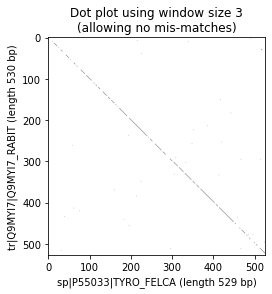

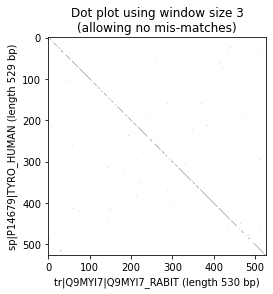

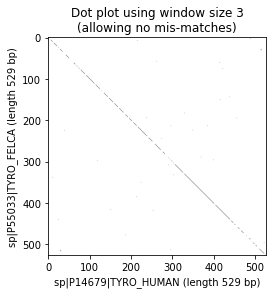

In [342]:
#Because above code is repeated, essentially, three times - function made outputs a dot plot:

window = 3#window size
seq_1 = str(X)#defining variable seq_1 as string of cat_tyr sequence
seq_2 = str(Y)#defining variable seq_2 as string of rab_tyr sequence
seq_3 = str(Z)#defining variable seq_3 as string of hum_tyr sequence

#Setting up function
def make_dot_plot(AA_data, tyr_AA_1, tyr_AA_2, seqA, seqB):#function_name(these are the variables that will need to be defined below.)
    AA_data = [
        [
            (seqA[i : i + window] != seqB[j: j + window])
            for j in range(len(seqA) - window)
        ]
        for i in range(len(seqB) - window)     
    ]
    pylab.gray()
    pylab.imshow(AA_data)#plot data above into graph
    pylab.xlabel("%s (length %i bp)" % (tyr_AA_1.id, len(tyr_AA_1)))#naming x-axis label
    pylab.ylabel("%s (length %i bp)" % (tyr_AA_2.id, len(tyr_AA_2)))#naming y-axis label
    pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)#naming title
    pylab.show()#show plot

#Using function
make_dot_plot(cat_rab_AA_data, cat_tyr_AA, rab_tyr_AA, seq_1, seq_2)#cat, rab
make_dot_plot(rab_hum_AA_data, rab_tyr_AA, hum_tyr_AA, seq_2, seq_3)#rab, hum
make_dot_plot(hum_cat_AA_data, hum_tyr_AA, cat_tyr_AA, seq_3, seq_1)#hum, cat

help for above code from challengeProblem_3-python.html on canvas

## Sequence logos

In [343]:
### Pairwise Sequence Alignment
#X=cat_tyr_seq_AA #defining variable seq_1 as string of cat_tyr sequence
#Y=rab_tyr_seq_AA
#Z=hum_tyr_seq_AA


#cat_rab_score = int(pairwise2.align.globalms(X, Y, 2, -1, -1, -.1, score_only=True))#added penalizations for gaps/extending gaps
#print('Cat_Rab_Score:', cat_rab_score)

#rab_hum_score = int(pairwise2.align.globalms(Y, Z, 2, -1, -1, -.1, score_only=True))
#print('Rab_Hum_Score:', rab_hum_score)

#cat_hum_score = int(pairwise2.align.globalms(X, Z, 2, -1, -1, -.1, score_only=True))
#print('Cat_Hum_Score:', cat_hum_score)

#for a in pairwise2.align.globalxx(cat_tyr_seq_AA, rab_tyr_seq_AA):
    #print(format_alignment(*a)) #shows aligned parts of sequences starting at start position
    #print(format_alignment(*a, full_sequences=True)) #also shows unaligned parts
#for a in pairwise2.align.globalxx(rab_tyr_seq_AA, hum_tyr_seq_AA):
    #print(format_alignment(*a))
    #print(format_alignment(*a, full_sequences=True))
#for a in pairwise2.align.globalxx(cat_tyr_seq_AA, hum_tyr_seq_AA):
    #print(format_alignment(*a))
    #print(format_alignment(*a, full_sequences=True))

In [344]:
#Defining Variables
X=cat_tyr_seq_AA
Y=rab_tyr_seq_AA
Z=hum_tyr_seq_AA

#Setting up function
def print_globalms_alignment_score(seq1, seq2, score_name):#function_name(these are the variables that will need to be defined below.)
    gms_align_score = int(pairwise2.align.globalms(seq1, seq2, 2, -1, -1, -.1, score_only=True))#added penalizations for gaps/extending gaps, outputs integer
    print(score_name, 'Score:', gms_align_score)

#Using function
print_globalms_alignment_score(X, Y, 'Cat_Rab')#cat, rab
print_globalms_alignment_score(Y, Z, 'Rab_Hum')#rab, hum
print_globalms_alignment_score(X, Z, 'Cat_Hum')#cat, hum

Cat_Rab Score: 847
Rab_Hum Score: 891
Cat_Hum Score: 871


Source for for loop in pairwise 2 (above): https://biopython.org/docs/1.75/api/Bio.pairwise2.html

In [345]:
#cat_rab_align = pairwise2.align.globalms(X, Y, 2, -1, -1, -.1)[0] #gap penalties added to get letters to stack
#print(format_alignment(*cat_rab_align)) this was used to for code check
#print(list(cat_rab_align[:2])) this was used for code check
#cr_align = lm.alignment_to_matrix(sequences=list(cat_rab_align[:2]), to_type='counts')#2 because first 2 are seqs
#cr_logo = lm.Logo(cr_align)
#cr_logo.ax.set_xlim([250,300])#chose this area because lots of differences in sequences

#rab_hum_align = pairwise2.align.globalms(Y, Z, 2, -1, -1, -.1)[0]
#print(format_alignment(*rab_hum_align)) this was used to for code check
#print(list(rab_hum_align[:2])) this was used for code check
#rh_align = lm.alignment_to_matrix(sequences=list(rab_hum_align[:2]), to_type='counts')
#rh_logo = lm.Logo(rh_align)
#rh_logo.ax.set_xlim([250,300])

#cat_hum_align = pairwise2.align.globalms(X, Z, 2, -1, -1, -.1)[0]
#print(format_alignment(*cat_hum_align)) this was used to for code check
#print(list(cat_hum_align[:2])) this was used for code check
#ch_align = lm.alignment_to_matrix(sequences=list(cat_hum_align[:2]), to_type='counts')
#print(ch_align.head()) code check, making sure matrices were made correctly.
#ch_logo = lm.Logo(ch_align)
#ch_logo.ax.set_xlim([250,300])

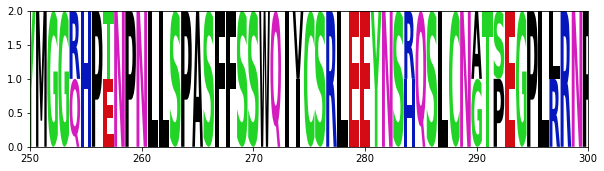

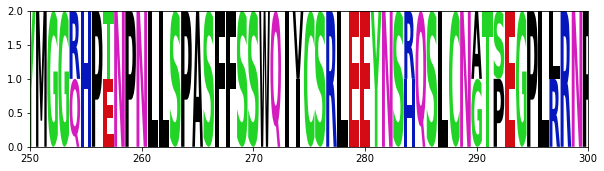

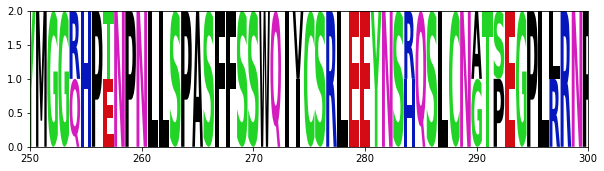

In [346]:
#Setting up function
def make_seq_logo(seqA, seqB):
    pair_align = pairwise2.align.globalms(Y, Z, 2, -1, -1, -.1)[0]#gap penalties added to get letters to stack
    matrix_align = lm.alignment_to_matrix(sequences=list(pair_align[:2]), to_type='counts')#2 because first 2 are seqs
    seq_logo = lm.Logo(matrix_align)
    seq_logo.ax.set_xlim([250,300])#chose this area because lots of differences in sequences

#Using function
make_seq_logo(X, Y) #cat, rabbit
make_seq_logo(Y, Z) #rabbit, human
make_seq_logo(X, Z) #cat, human

help for above code from: https://github.com/jbkinney/logomaker/tree/76aae02e03af9a5abc0880054d7d0c9a6f571c07/logomaker/tutorials

## Swiss Model
Model accuracy shown below, with labels

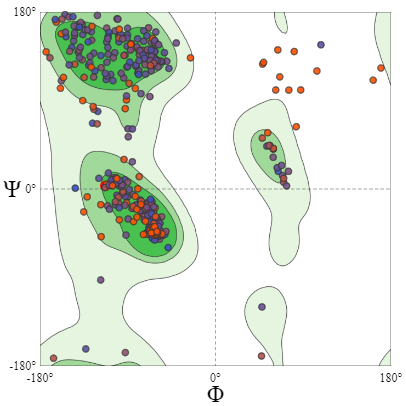
Rabbit_Cat Model

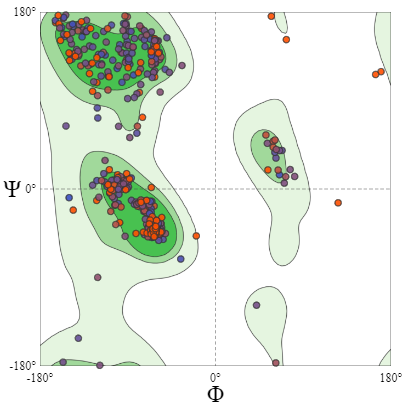
Rabbit_Human Model

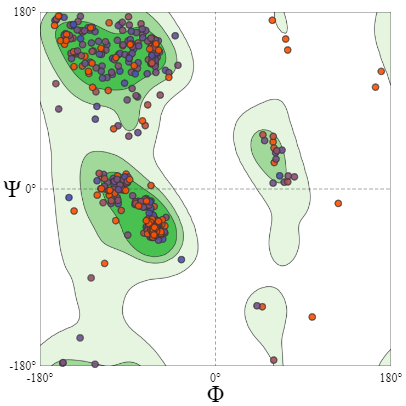
Cat_Human Model

## PyMOL

#### Cat Rabbit Model

In [347]:
from IPython.display import IFrame
HTML('HTML(<iframe width="560" height="315" src="https://www.youtube.com/embed/De5ftD00j9E" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##### At the 20 second mark (0:20), an extended tail can be seen on the cat protein that is not part of the cat rabbit model. We used a cat rabbit model and overlayed a cat protein model (and later, a human) to try to figure out the rabbit protein structure, since it was not available. At 0:35, a change in the corkscrew tail can be seen, where the cat protein seems to dip more at the end than the cat rabbit model. There is also a slight change in the body of the protein.

#### Cat Human Aligned

In [348]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/SmGqChPU4Ok" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##### At 13 seconds in (0:13), at the right side of the screen, a major difference can be seen between the cat and human protein structures. The human protein cork-screws while the cat has a thin tail. The corkscrew tails of both proteins also point in different directions from each other. Outside of the tails, there is not much difference in the bodies of both proteins.

#### Rabbit Human Model

In [349]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/odlmopIPX8A" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##### At 0:05, there is a difference at the end of the corkscrew tail, that can be seen more clearly at 0:14. There are actually not that many differences between the two, as can be seen in the body close up at the end.

#### Cat Human Model

In [350]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/MOPMVkdkenE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##### This is similar to the cat human aligned model, except this is overlapping the cat protein and the human protein over the cat human model in PyMOL. The human protein has a straighter end to its corkscrew tail than the cat human model, when looking at the multicoloured corkscrew. There seems to be quite a difference between the cat and human protein - at least more differences than the human to rabbit protein.

## Analysis:

Looking at the pairwise sequence alignment scores and the videos created in PyMOL using homology modeling, it looks to be that the rabbit and human tyrosinase are the most similar to each other, while the cat and rabbit tyrosinase are the least similar to each other. For the sequence alignment used for the dot plots, the scores were:

Cat_Rab Score: 459
Rab_Hum Score: 474
Cat_Hum Score: 468

For the sequence alignment used for the sequence logos, the scores were:

 
Cat_Rab Score: 847
Rab_Hum Score: 891
Cat_Hum Score: 871

A higher score means a better alignment, and since the same penalties and scoring methods were used for all three within each type of sequence alignment, the one with the highest score should be the best aligned. In this case, for both, the highest alignment score belowed to the rabbit human comparison. This is what was also shown in the videos, as the rabbit human comparison had less differences than the other two. Both methods (PyMOL and pairwise sequence alignment) also showed that the cat to rabbit comparison had the most differences.